# Case Study: How Can a Wellness Technology Company Play It Smart?

# Bellabeat App

[Bella Beat](https://bellabeat.com/) is a high-tech manufacturer of health-focused products for women, and develop wearables and accompanying products that monitor biometric and lifestyle data to help women better understand how their bodies work and make healthier choices. They offer the following products:

- **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. 


- **Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip that connects to the Bellabeat app to track activity, sleep, and stress.


- **Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity.


- **Spring:** This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. 


- **Bellabeat membership:** Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.



# Ask:
The purpose of this study is to analyze the trends and relations between different physical activities that are a part of users’ lifestyle and draw conclusions from it. These results help the company to come up with more innovative ideas to help user.

## Business Questions: 

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


# 1. Importing Libraries

In [7]:
# 1. Importing Libraries

#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

import math
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Read Dataset in Pandas DataFrame

# Daily activities data
daily_act = pd.read_csv('dailyActivity_merged.csv')

# Sleep data
sleep = pd.read_csv('sleepDay_merged.csv')

#Copy all datasets
daily_act_org = daily_act.copy()
slee_org = sleep.copy()

In [9]:
# Display first five rows of datasets 
daily_act.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
# Display first five rows of datasets 
sleep.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


# Prepare:
**Data validation**
The data source used for our case study is FitBit Fitness Tracker Data.

The data has been collected from Fit Bit fitness tracker data. (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from 30 fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

The data is stored in 18 long-format file. It is distributed on the basic of different activities and stored in minutes, second and daily basis. 

# Process:
We can begin our process phase by:

- Checking size of dataset
- Total number of users in each dataset
- remove duplicates and null values
- Checking null values
- Checking the data for errors
- Transforming the data so you can work with it effectively

In [11]:
# Size of datasets
print("The total number of rows and columns of daily activites is", daily_act.shape)
print("The total number of rows and columns of sleep activites is", sleep.shape)


The total number of rows and columns of daily activites is (940, 15)
The total number of rows and columns of sleep activites is (413, 5)


In [12]:
# Find out the total number of duplicates to remove it

print("Total duplicate rows in daily activity datasets are", daily_act.duplicated().sum())
print("Total duplicate rows in sleep datasets are", sleep.duplicated().sum())

Total duplicate rows in daily activity datasets are 0
Total duplicate rows in sleep datasets are 3


In [13]:
# Remove duplicates columns in Sleep dataset
sleep = sleep.drop_duplicates()

In [14]:
# Replacing blank spaces with no space
daily_act = daily_act.iloc[:].replace(" ", "")
sleep = sleep.iloc[:].replace(" ", "")


In [15]:
# Check Null Values to remove it
print(daily_act.isnull().sum(),"\n")
print(sleep.isnull().sum(),"\n")


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64 

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64 



In [16]:
# Check the total number of users in each data

print("There are total" ,daily_act['Id'].nunique(), "users in daily activity data")
print("There are total" ,sleep['Id'].nunique(), "users in sleep data")


There are total 33 users in daily activity data
There are total 24 users in sleep data


#### Limitation of Data:
- The sample size is very low
- Meta data is not available

In [17]:
# Number of users who completed their record their daily activities
print(daily_act['Id'].value_counts())
print("There are some users who haven't record 31 days\n")

print(sleep['Id'].value_counts())
print("There are some users who haven't record 31 days\n")

1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64
There are some users who haven't record 31 days

8378563200    31
6962181067    31
5553957443    31
2026352035    28
3977333714    28
4445114986    28
4702921684    27
5577150313    26
4319703577    26
1503960366    25
7086361926    24
4388161847    23
6117666160    18
8792009665    15
2347167796    15
4020332650     8
1927972279     5
4558609924     5
1644430081     4
6775888955     3
8053475328     3
1844505072

In [21]:
# Check data types of all sets
daily_act.info()
sleep.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [22]:
# Since the data type of ActivityDate is Object, I'm converting it to its appropriate datatype
daily_act["ActivityDate"]=pd.to_datetime(daily_act["ActivityDate"])
sleep["SleepDay"]=pd.to_datetime(sleep["SleepDay"])

daily_act.info()
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [23]:
print(daily_act.nunique())

print("The data is showing data of ",daily_act['Id'].nunique(),"user", 
      "and showing activity data of ", daily_act['ActivityDate'].nunique(), "days")

Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
User                          1
dtype: int64
The data is showing data of  33 user and showing activity data of  31 days


## Data Transformation  
In this process, I am going to analyze data to analyze the trends of different activities to get insights about users' lifestyle and how Bellabeat can play their role in imporving the lifestyle of its targeted audience. 

## Daily Activity Data sets

We have following attributes to process before analyzing the data:
1. Total steps
2. Distance
2. Active and Inactive time
4. Calories

## How user spend their total minutes 

The Active minutes are also divided into four types:

    1. VeryActiveMinutes
    
    2. FairlyActiveMinutes
    
    3. LightlyActiveMinutes
    
    4. Sedentary Minutes (Inactive)
    
I will add all the minutes into "Total minutes" and analyze the relationship/ratio of Inactive minutes

In [24]:
# Make subcolumns from Activity date to 
daily_act['MonthNo'] = pd.DatetimeIndex(daily_act['ActivityDate']).month
daily_act['Month'] = pd.DatetimeIndex(daily_act['ActivityDate']).month_name()
daily_act['Day'] = pd.DatetimeIndex(daily_act['ActivityDate']).day_name()
daily_act.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,User,MonthNo,Month,Day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0,4,April,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0,4,April,Wednesday


In [25]:
# Creatin two new columns "Total Distance" and "Total Minutes"
daily_act['Total_minutes'] = daily_act['VeryActiveMinutes'] + daily_act['FairlyActiveMinutes'] +daily_act['LightlyActiveMinutes'] +daily_act['SedentaryMinutes']

daily_act.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,User,MonthNo,Month,Day,Total_distance,Total_minutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,0,4,April,Tuesday,8.49,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,0,4,April,Wednesday,6.97,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,11,181,1218,1776,0,4,April,Thursday,6.75,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,0,4,April,Friday,6.23,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,0,4,April,Saturday,8.16,1040


Now what I'm going to do is divide SedantaryMinutes by its TotalMinutes *100 in order to get the percentage of minutes spent sedentary(Inactive) by the given population


In [26]:
# Sedentary Ratio of each user 
daily_act['Sedentary_ratio'] = round(daily_act['SedentaryMinutes'] /  daily_act['Total_minutes'] *100,2)
daily_act.head(2)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,User,MonthNo,Month,Day,Total_distance,Total_minutes,Sedentary_ratio
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,0,4,April,Tuesday,8.49,1094,66.54
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,217,776,1797,0,4,April,Wednesday,6.97,1033,75.12


## Sleep Data

In [54]:
# Make subcolumns from Sleep data to 

sleep['Day'] = pd.DatetimeIndex(sleep['SleepDay']).day_name()
sleep['Hour'] = pd.DatetimeIndex(sleep['SleepDay']).time
sleep['TotalMinutesAwake'] = sleep['TotalTimeInBed'] -sleep['TotalMinutesAsleep']
sleep['Sleeptime'] = round(sleep['TotalMinutesAsleep']/60,0)
sleep['Ratio'] =sleep['TotalMinutesAsleep'] / sleep['TotalTimeInBed'] *100

sleep.head(4)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day,Hour,TotalMinutesAwake,Ratio,Sleeptime
0,1503960366,2016-04-12,1,327,346,Tuesday,00:00:00,19,94.508671,5.0
1,1503960366,2016-04-13,2,384,407,Wednesday,00:00:00,23,94.348894,6.0
2,1503960366,2016-04-15,1,412,442,Friday,00:00:00,30,93.212670,7.0
3,1503960366,2016-04-16,2,340,367,Saturday,00:00:00,27,92.643052,6.0


# Analysis

## Daily Activity 

In [28]:
# Describe Basic Information about the data
daily_act.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,MonthNo,Total_distance,Total_minutes,Sedentary_ratio
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,4.350000,5.412649,1218.753191,79.983777
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.477224,3.936421,265.931767,11.783663
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,4.000000,2.540000,989.750000,73.052500
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,4.000000,5.175000,1440.000000,78.585000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000,7.637500,1440.000000,87.605000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,5.000000,28.040000,1440.000000,100.000000


In [29]:
# Average Inactive minutes spent by user
print("Average Inactive minutes spent by user", round(daily_act['Sedentary_ratio'].mean(),0), "%")

Average Inactive minutes spent by user 80.0 %


**Some observations from the summary:**

- The average total steps are 7,639 but if we take a closer look then 25% of our users lives extremet inactive lifestyle.
- If we compare average steps taken to burn calories then we came to know that calories consumption is very high as compare to taken steps. 
- The average distance covered by each user is 5.0
- Users spend approx 80% of their time sedentary(Inactive) while wearing the fitbit bands
- The average inactive minutes of a user is upto 991 which makes upto 16 hours in a day. It indictates that users are mostly inactive. If we talk about other active minutes, then the average of Lightly active minutes is 3 hours.


### Daily Analysis

In [30]:
print("Average steps taken by User in a day")
daily_act.groupby('Day')['TotalSteps'].mean().sort_values(ascending = False)

Average steps taken by User in a day


Day
Saturday     8152.975806
Tuesday      8125.006579
Monday       7780.866667
Wednesday    7559.373333
Friday       7448.230159
Thursday     7405.836735
Sunday       6933.231405
Name: TotalSteps, dtype: float64

In [31]:
print("Average steps, distance and calories of a User in a day")

daily_act.groupby('Day').agg({'TotalSteps': 'median',
                             'TotalDistance': 'median',
                             'Calories' : 'median'}).sort_values('TotalSteps',ascending = False)

Average steps, distance and calories of a User in a day


,TotalSteps,TotalDistance,Calories
Day,,,
Tuesday,8411.0,6.02,2229.0
Thursday,7860.0,5.32,2065.0
Monday,7625.5,5.23,2182.0
Friday,7408.0,5.08,2203.5
Wednesday,7317.0,5.41,2143.0
Saturday,6946.0,4.90,2127.5
Sunday,6083.0,4.18,2063.0


Most active days are Saturday followed by Tuesday
- Saturday has high number of steps 
- Sunday has less average steps as it's a rest day.

In [32]:
daily_act.groupby('Day').agg({'VeryActiveMinutes': 'median',
                              'FairlyActiveMinutes':'median',
                              'LightlyActiveMinutes':'median',
                              'SedentaryMinutes': 'median',
                              'Sedentary_ratio': 'mean'}).sort_values('Sedentary_ratio', ascending = False)

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Sedentary_ratio
Day,,,,,
Sunday,0.0,1.0,185.0,1060.0,81.119669
Monday,8.0,8.0,201.5,1088.0,80.423333
Wednesday,5.0,8.0,191.0,1053.0,80.251600
Tuesday,7.5,8.0,209.0,1063.0,80.220987
Thursday,3.0,6.0,190.0,957.0,80.020340
Friday,1.5,5.0,205.0,1065.0,79.529365
Saturday,3.0,4.0,223.0,1076.5,78.253629


- Users spent very less time in very active and fairly active activities.
- Roughly 3-4 hours spent in light active activities.
- Mostly users are inactive (16-17 hours) which means that their jobs involves work in sitting position due to which their sedentary minutes are high

## Sleep data

In [33]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalMinutesAwake,Ratio
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,39.309756,91.646671
std,2.060863e+09,0.346636,118.635918,127.455140,46.710932,8.728386
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000,49.836066
25%,3.977334e+09,1.000000,361.000000,403.750000,17.000000,91.181156
50%,4.702922e+09,1.000000,432.500000,463.000000,25.500000,94.263857
75%,6.962181e+09,1.000000,490.000000,526.000000,40.000000,96.064164
max,8.792010e+09,3.000000,796.000000,961.000000,371.000000,100.000000


In [34]:
sleep.groupby('Day').agg({'TotalMinutesAsleep': 'median',
                              'TotalTimeInBed':'mean',
                              'Ratio':'median'}).sort_values('TotalMinutesAsleep', ascending = False)

,TotalMinutesAsleep,TotalTimeInBed,Ratio
Day,,,
Sunday,481.0,503.509091,93.421053
Wednesday,444.5,470.030303,94.317970
Monday,434.0,457.347826,94.813487
Saturday,426.0,459.842105,94.961240
Thursday,423.5,434.875000,94.104719
Tuesday,417.0,443.292308,93.899204
Friday,405.0,445.052632,94.362745


In [35]:
print("On average, users take", round(sleep['TotalMinutesAsleep'].mean()/60,0), "hours of sleep and spent approx.", round(sleep['TotalMinutesAwake'].mean(),0), " minutes in bed before sleeping on daily basis.\n",
"On Sunday, people take 8 hours sleep which is high as compare to other days.")

On average, users take 7.0 hours of sleep and spent approx. 39.0  minutes in bed before sleeping on daily basis.
 On Sunday, people take 8 hours sleep which is high as compare to other days.


# Share and Act

### Correlation

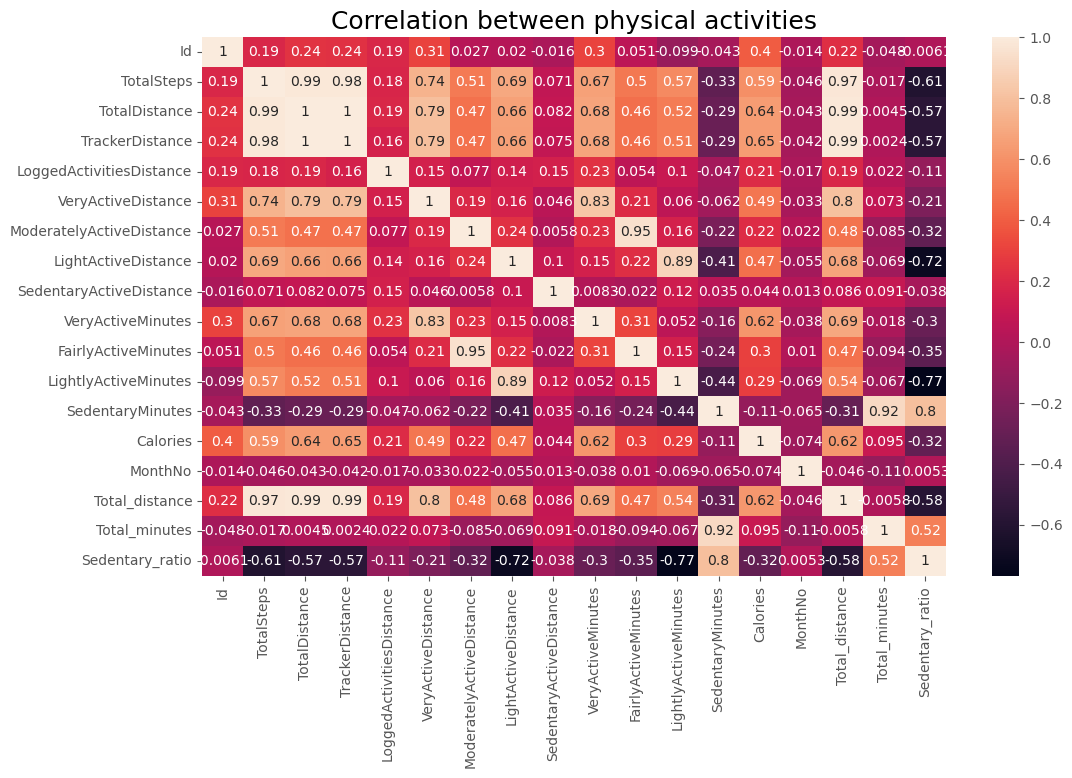

In [36]:
#Create heatmap to analyze relationships
# Set figure size
plt.figure(figsize=(12,7))

# Plotting
sns.heatmap(daily_act.corr(), annot = True)

#Setting title
plt.title ("Correlation between physical activities", fontsize=18)

plt.show()

- Total steps are positively associated with Calories and Active minutes and negatively associated with Inactive minutes.
- Total Calories is also positively associated with Active minutes and negatively associated with Inactive minutes.

### Ratio of Sedentary Minutes to Total Minutes

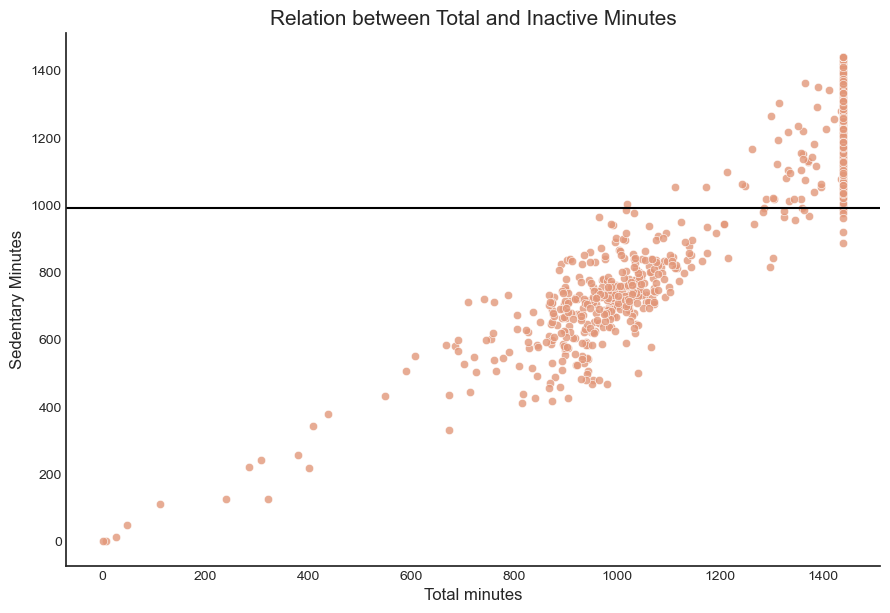

In [37]:
# Setting Style
style.use("seaborn-white")

# Plotting
sns.relplot(x='Total_minutes', y ='SedentaryMinutes', data = daily_act, kind='scatter', color = '#E29779', 
            marker = 'o', alpha = 0.8, height = 6, aspect = 1.5 )

# Average Inactive minutes
Avg_SedentaryMinutes=daily_act['SedentaryMinutes'].mean()
plt.axhline(Avg_SedentaryMinutes, color = "Black", label = "Avg_SedentaryMinutes")

# Setting Titles and labels
plt.title("Relation between Total and Inactive Minutes", fontsize = 15)
plt.xlabel("Total minutes", fontsize = 12)
plt.ylabel("Sedentary Minutes", fontsize = 12)
 
#Display the plot
plt.show()

- In 24 hours, we have 1440 minutes.  
This is a positive correlation. As the amount of total minutes increases, the inactive minutes increase too, mostly users spend their time remain inactive and doesn't engage in physical activities. Users may involve in activites that doesnot physical movements.


### Distribution of Minutes

This is the visual look of distribution of minutes. How users are distributed and spent their time in different active and inactive minutes

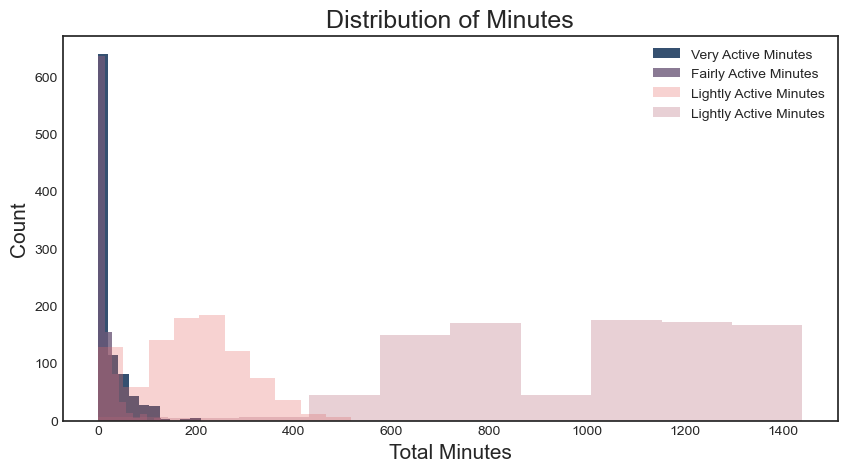

In [38]:
# Setting figure size
plt.figure(figsize=(10,5))


# Plotting
plt.hist(daily_act['VeryActiveMinutes'], label="Very Active Minutes", color='#355070')

plt.hist(daily_act['FairlyActiveMinutes'], alpha=0.8, label="Fairly Active Minutes", color='#6d597a')

plt.hist(daily_act['LightlyActiveMinutes'],alpha=0.3, label="Lightly Active Minutes",color='#e56b69')

plt.hist(daily_act['SedentaryMinutes'],alpha=0.3, label="Lightly Active Minutes",color='#b56576')


# Title and Labeling
plt.title ("Distribution of Minutes", fontsize=18)
plt.xlabel("Total Minutes", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

plt.legend(loc='upper right')

plt.show()

**Few Observations**

- Majority data point in Very Active lie under 200 minutes 
- Users are more engage in Light activities minutes (3-5 hours)

### Relationship between total Steps and Calories

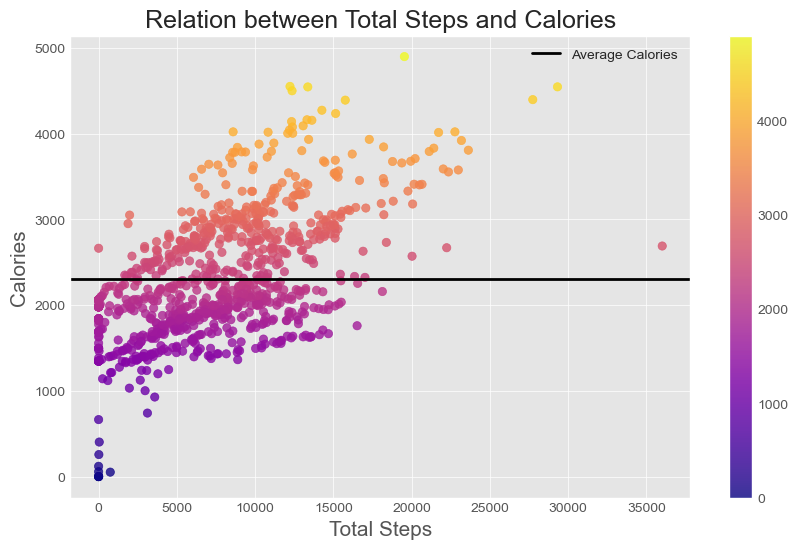

In [91]:
# Setting Style
style.use("ggplot")

plt.figure(figsize=(10,6))

# Plotting, a
plt.scatter(daily_act['TotalSteps'], daily_act['Calories'],c=daily_act['Calories'], cmap=plt.cm.get_cmap('plasma'), alpha =0.8)

Avg_Steps=daily_act['Calories'].mean()
plt.axhline(Avg_Steps, color = "Black", label = "Average Calories")


# Setting Titles and labels
plt.title("Relation between Total Steps and Calories", fontsize = 18)
plt.xlabel("Total Steps", fontsize = 15)
plt.ylabel("Calories", fontsize = 15)

plt.colorbar()
plt.legend()

#Display the plot
plt.show()



- The Scatter shows that there is positive relationships between the two variables.

- The higher total steps that users walk or run, more calories user burn
- There is an outlier which show maximum steps 35,000. It could be an error in recording steps.
- On average, the users are burning approx. 2,000 calories but the result varies. If we analyze 15,000 steps, the calories burning amount range from 2,000 to 4,000. This variety in burning calories occur due to Very Active, Farily Active and Lightly Active User.


### Daily basis activities

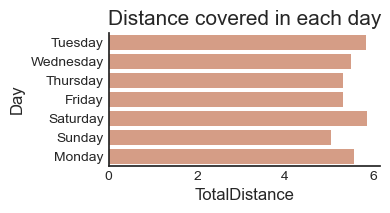

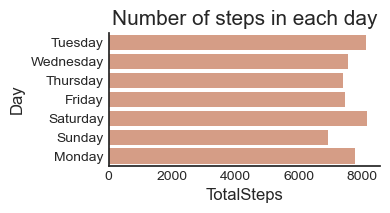

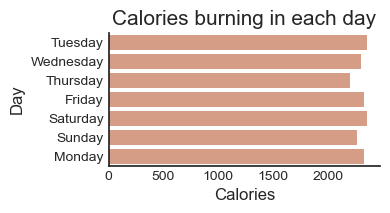

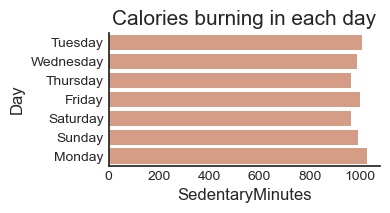

In [62]:
#Setting color
style.use("seaborn-white")

# Plotting
sns.catplot(x='TotalDistance', y ='Day',  data = daily_act, kind='bar' ,  ci= None, aspect = 2, height = 2, color = '#E29779')
plt.title("Distance covered in each day", fontsize = 15)

# Plotting
sns.catplot(x='TotalSteps', y ='Day', data = daily_act, kind='bar' ,  ci= None, aspect = 2, height = 2, color = '#E29779')
plt.title("Number of steps in each day", fontsize = 15)

# Plotting
sns.catplot(x='Calories', y ='Day', data = daily_act, kind='bar' ,  ci= None, aspect = 2, height = 2, color = '#E29779')
plt.title("Calories burning in each day", fontsize = 15)
Pa

#Display the plot
plt.show()

Mostly users are active on Saturday followed by Tuesday. These 2 days are also the days that users consume the highest calories in the entire week.

### Does High Sendentary time lead to low number of steps?

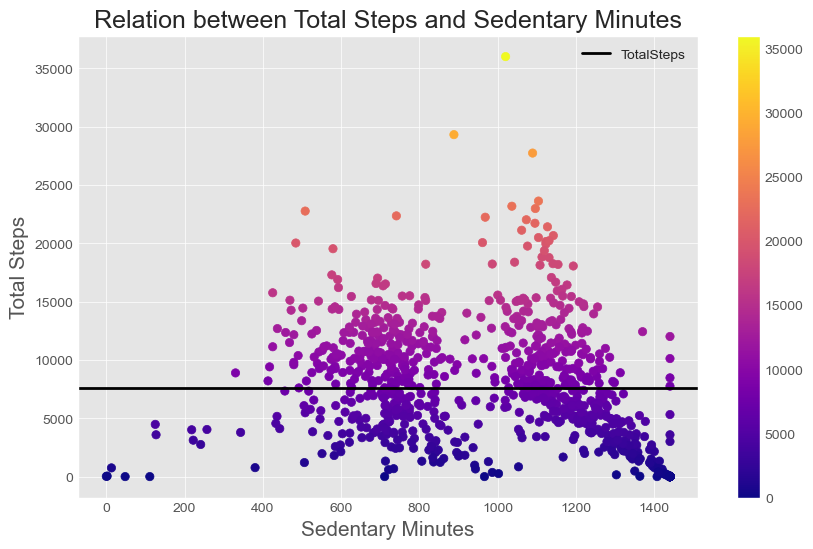

In [92]:
# Setting Style
style.use("ggplot")

plt.figure(figsize=(10,6))

# Plotting
plt.scatter(daily_act['SedentaryMinutes'], daily_act['TotalSteps'],c=daily_act['TotalSteps'], cmap=plt.cm.get_cmap('plasma'))

Avg_Steps=daily_act['TotalSteps'].mean()
plt.axhline(Avg_Steps, color = "Black", label = "TotalSteps")


# Setting Titles and labels
plt.title("Relation between Total Steps and Sedentary Minutes", fontsize = 18)
plt.xlabel("Sedentary Minutes", fontsize = 15)
plt.ylabel("Total Steps", fontsize = 15)

plt.colorbar()
plt.legend()

#Display the plot
plt.show()




- Sedentary Minutes and TotalSteps does not have a linear relationship. 
- It can be observed that 
But it can be observed that number of steps will increase when sedentary minutes are from 0-500 mins, and number of steps will reduce when sedentary minutes are from 1000-1500. This is interesting, because we can recommend users who have sedentary time more than 1000 minutes should start exercising more.



## Sleep Data

### Relation between total time in bed vs sleep

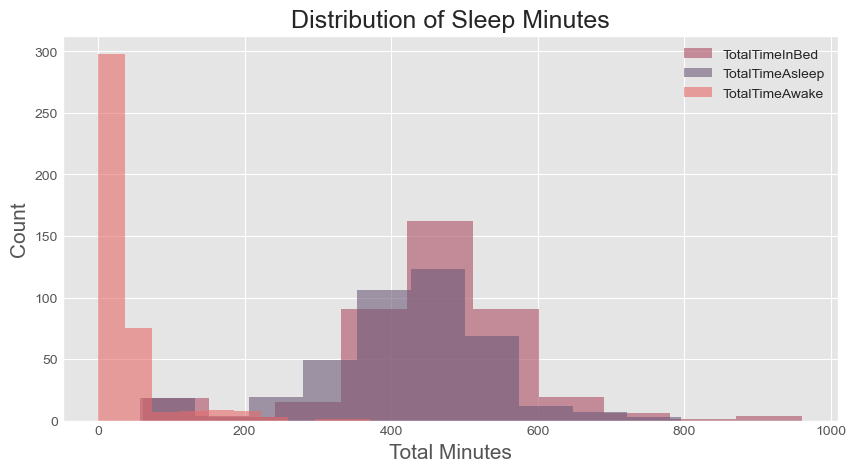

In [43]:
# Setting figure size
plt.figure(figsize=(10,5))


# Plotting
plt.hist(sleep['TotalTimeInBed'], label="TotalTimeInBed", color='#b56576',alpha=0.7)
plt.hist(sleep['TotalMinutesAsleep'], label="TotalTimeAsleep", color='#6d597a',alpha = 0.6)
plt.hist(sleep['TotalMinutesAwake'], label="TotalTimeAwake", color='#e56b69',alpha = 0.6)

# Title and Labeling
plt.title ("Distribution of Sleep Minutes", fontsize=18)
plt.xlabel("Total Minutes", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

plt.legend(loc='upper right')

#Display plot
plt.show()

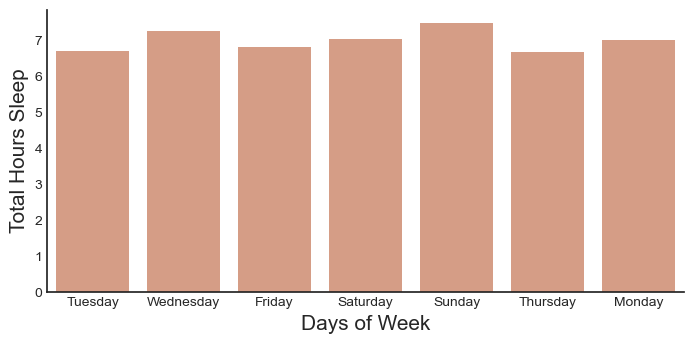

In [60]:
#Setting color
style.use("seaborn-white")

palette = sns.color_palette("crest") 


# Plotting
sns.catplot(x='Day', y ='Sleeptime', data = sleep, kind='bar' ,  ci= None, aspect = 2, height = 3.5, color = '#E29779')

#plt.title("Number of steps in each day", fontsize = 18)

# Setting Titles and labels
plt.xlabel("Days of Week", fontsize = 15)
plt.ylabel("Total Hours Sleep", fontsize = 15)

#Display the plot
plt.show()

## Insights

#### 1. What are some trends in smart device usage?
- Majority (80%) of users engage in sedentary activities like working in a sitting arrangement or doing nothing. While 20% of "active" users, the majority of users engage doing light activities.


- The extreme minority of users who are very active or are fairly active doing exercises 1000-2000 calories in the same amount of period.


- Most users are active on Saturday followed by Tuesday. These 2 days are also the days that users burnt the highest calories in the entire week.


- On average, users take 7.0 hours of sleep and spent approx. 39.0 minutes in bed before sleeping daily. On Sunday, people take 8 hours of sleep which is high as compared to other days.


- People are not using lifestyle products but are not consistent with following good healthy habits and making proper steps, sleeping, and spending their time more actively.


#### 2. How could these trends apply to Bellabeat customers?
We analyzed these trends to see how users are consistent in using these smart devices to make their lifestyles healthy. The insights can be applied to make this lifestyle product better for users to fully adapt these devices in their daily lives.



#### 3. How could these trends help influence Bellabeat marketing strategy?
These insights help to design Bellabeat marketing strategy as per the consumers' mindset.


# Act
Some of the recommendations are: 
## Social Media Campaigns
- It is very important to spread awareness about healthy lifestyles and how users incorporate these lifestyle products to track their progress. 
- The company can create ad campaigns where they show the importance of a healthy lifestyle and how we can use Bellabeat lifestyle products and app to make our health goals, track it and accomplish it. These types of the campaign make a good positioning of the brand and its concept. This helps increase the consistent use of lifestyle products
- We can also collect a good amount of data which helps the company to make more improvisations in the future. 


## User Experience Design


### Blog Post


- It has been observed that users have spent high time being inactive, having low sleep, and not doing enough steps. Bellabeat can add blog post features in the app which include:


- Daily short articles and blogs can be published on the app where harmful effects of an unhealthy lifestyle can be shared such as having effects of having highly Sedentary time, and lack of sleep can be shared. Also, recommendations should be given on how users can change their unhealthy habits with small steps and stay consistent in their journey. These kinds of things help their targeted audience adopt healthy habits.

### Notification Alerts:

Notifications alerts should be displayed on the users' phones to remind them if they are inactive or sitting in an idle position for more than 2 hours to have a little or remind the recommended sleep time to the user. Such notifications will help the users to stay consistent and remindful about following healthy habits.

### Goal Setting Calculator

Bellabeat App can design such a matrix where user can add their current weight, height, and age, and the calculator can show the recommended number of steps, calorie consumption, active minutes of activity, and sleep time that the user should adopt. It will help the user to set their goals about the recommended insights

